In [1]:
!pip install pykalman
!pip install pycaret
!pip install yfinance
!pip install ta
!pip install mxnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.9/228.9 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pykalman: filename=pykalman-0.9.5-py3-none-any.whl size=48443 sha256=658baf3a31fea298ad4f2836c075d4504a9fe08f7d3b8928c16a31a7a02bd3ba
  Stored in directory: /root/.cache/pip/wheels/76/33/ef/5f332226e13a5089c6dd4b01cc2bcb59491d18f955fa2d3807
Successfully built pykalman
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 14.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 9.2 

In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
from ta import add_all_ta_features

In [3]:
listSymbols = ['^VIX', 'ES=F', 'YM=F', 'NQ=F', 'ZB=F', 'ZN=F', 'ZT=F', 'GC=F', 'SI=F', 'HG=F', 'CL=F', 'HO=F', 'NG=F', 'BZ=F', '^GSPC', '^DJI', '^NYA', '^XAX',
              '^RUT', '^VIX', '^FTSE', '^GDAXI', '^FCHI', '^STOXX50E', '^N100', '^BFX', '^N225', '399001.SZ', '^STI', '^AXJO', '^AORD', '^BSESN', '^JKSE', '^KLSE',
              '^NZ50', '^KS11', '^TWII', '^GSPTSE', '^BVSP', '^MXX', '^IPSA', '^MERV', '^CASE30', '^JN0U.JO', 'EURUSD=X', 'JPY=X', 'GBPUSD=X', 'AUDUSD=X', 'NZDUSD=X', 'EURJPY=X',
              'GBPJPY=X', 'EURGBP=X', 'EURCAD=X', 'EURSEK=X', 'EURCHF=X', 'EURHUF=X', 'EURJPY=X', 'CNY=X', 'HKD=X', 'SGD=X', 'INR=X', 'MXN=X', 'PHP=X', 'IDR=X', 'THB=X', 'MYR=X',
              'ZAR=X', 'RUB=X', 'BTC-USD', 'ETH-USD', '^IRX', '^FVX', '^TNX', '^TYX', 'AAPL', 'MSFT', 'GOOG', 'GOOGL', 'AMZN', 'NVDA', 'META', 'TSLA', 'JPM', 'TSM', 'JNJ', 'XOM',
              'WMT', 'PG', 'ORCL', 'CVX', 'BAC', 'MRK', 'KO', 'PEP', 'BABA', 'CSCO', 'AZN', 'PFE', 'CMCSA', 'CVX', 'AMD', 'NEE', 'MDT', 'SCHW', 'NKE', 'DIS', 'WFC', 'MS', 'VZ',
              'VALE3.SA', 'PETR4.SA', 'ITUB4.SA', 'BBAS3.SA', 'PRIO3.SA', 'B3SA3.SA', 'LREN3.SA', 'GOLL4.SA', 'MGLU3.SA', 'RADL3.SA', 'WEGE3.SA', 'BBDC4.SA', 'USIM5.SA', 'BPAC11.SA',
              'COGN3.SA', 'AZUL4.SA']

target_date = '2023-08-11'

df2 = yf.download('^BVSP', start='2001-01-01', end='2024-01-01').reset_index()
df2['Date'] = df2['Date'].dt.strftime('%Y-%m-%d')
df2 = df2[['Date', 'Adj Close']]

for i in listSymbols:
  try:
      df2_aux = yf.download(i, start='2001-01-01', end='2024-01-01').reset_index()
      df2_aux['Date'] = df2_aux['Date'].dt.strftime('%Y-%m-%d')

      df2_zero = pd.DataFrame()
      df2_zero['Date'] = df2_aux['Date'].copy()

      conditional = target_date in df2_aux['Date'].values

      if conditional:

        df2_aux = add_all_ta_features(df2_aux, open="Open", high="High", low="Low", close="Close", volume="Volume", fillna=True)

        df2_aux = df2_aux.drop(['Date', 'others_dr', 'others_dlr', 'others_cr'], axis=1)

        for column in list(df2_aux.columns):
          df2_zero[f'{i}_{column}'] = df2_aux[column]

        for j in range(2, 20):
          df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)


        close_fft = np.fft.fft(np.asarray(df2_zero[f'{i}_Close'].tolist()))
        fft_df = pd.DataFrame({'fft':close_fft})
        fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
        fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))

        fft_list = np.asarray(fft_df['fft'].tolist())
        for num_ in [3, 5, 10, 15, 22]:
            fft_list_m10= np.copy(fft_list); fft_list_m10[num_:-num_]=0
            df_testando = pd.DataFrame(np.fft.ifft(fft_list_m10))
            df_testando[f'fourier_real_{num_}_{i}'] = df_testando[0].apply(lambda x: x.real)
            df_testando[f'fourier_im_{num_}_{i}'] = df_testando[0].apply(lambda x: x.imag)
            df_testando[f'fourier_{num_}_{i}'] = df_testando[f'fourier_real_{num_}_{i}'] + df_testando[f'fourier_im_{num_}_{i}']

            df2_zero[f'fourier_real_{num_}_{i}'] = df_testando[f'fourier_real_{num_}_{i}']
            df2_zero[f'fourier_im_{num_}_{i}'] = df_testando[f'fourier_im_{num_}_{i}']
            df2_zero[f'fourier_{num_}_{i}'] = df_testando[f'fourier_{num_}_{i}']

        df2 = df2_zero.merge(df2, on='Date', how='left')
  except:
    pass

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many time

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many time

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many time

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many time

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.i

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many time

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.i

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:812: RuntimeWarning: invalid value encountered in double_scalars
  dip[i + self._window] = 100 * (self._dip[i] / self._trs[i])
/usr/local/lib/python3.10/dist-packages/ta/trend.py:827: RuntimeWarning: invalid value encountered in double_scalars
  din[i + self._window] = 100 * (self._din[i] / self._trs[i])
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_ze

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:812: RuntimeWarning: invalid value encountered in double_scalars
  dip[i + self._window] = 100 * (self._dip[i] / self._trs[i])
/usr/local/lib/python3.10/dist-packages/ta/trend.py:827: RuntimeWarning: invalid value encountered in double_scalars
  din[i + self._window] = 100 * (self._din[i] / self._trs[i])
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_ze

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:812: RuntimeWarning: invalid value encountered in double_scalars
  dip[i + self._window] = 100 * (self._dip[i] / self._trs[i])
/usr/local/lib/python3.10/dist-packages/ta/trend.py:827: RuntimeWarning: invalid value encountered in double_scalars
  din[i + self._window] = 100 * (self._din[i] / self._trs[i])
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has p

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:812: RuntimeWarning: invalid value encountered in double_scalars
  dip[i + self._window] = 100 * (self._dip[i] / self._trs[i])
/usr/local/lib/python3.10/dist-packages/ta/trend.py:827: RuntimeWarning: invalid value encountered in double_scalars
  din[i + self._window] = 100 * (self._din[i] / self._trs[i])
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_ze

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

In [4]:
df_checkpoint1 = df2.copy()

In [5]:
df = yf.download('VALE3.SA', start='2001-01-01', end='2024-01-01').reset_index()
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')

df2_copia = df2.copy()

df = df.merge(df2_copia, on='Date', how='left')

for i in range(2, 22):
  df[f'Close{i}'] = df['Close'].shift(i)

df = add_all_ta_features(df, open="Open", high="High", low="Low", close="Close", volume="Volume", fillna=True)

df = df.drop(['Date', 'others_dr', 'others_dlr', 'others_cr'], axis=1)

df3 = df.copy()

cols_with_inf = df3.columns[df3.isin([np.inf, -np.inf]).any()]

for col in cols_with_inf:
    for idx, value in df3[df3[col].isin([np.inf, -np.inf])][col].iteritems():
        if idx > 0:
            df3.at[idx, col] = df3.at[idx - 1, col]

cols_with_inf = df3.columns[df3.isin([np.inf, -np.inf]).any()]

for col in cols_with_inf:
    for idx, value in df3[df3[col].isin([np.inf, -np.inf])][col].iteritems():
        if idx > 0:
            df3.at[idx, col] = 0

close_fft = np.fft.fft(np.asarray(df3['Close'].tolist()))
fft_df = pd.DataFrame({'fft':close_fft})
fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))

fft_list = np.asarray(fft_df['fft'].tolist())
for num_ in [3, 5, 10, 15, 22]:
    fft_list_m10= np.copy(fft_list); fft_list_m10[num_:-num_]=0
    df_testando = pd.DataFrame(np.fft.ifft(fft_list_m10))

    df_testando[f'fourier_real_{num_}_Close'] = df_testando[0].apply(lambda x: x.real)
    df_testando[f'fourier_im_{num_}_Close'] = df_testando[0].apply(lambda x: x.imag)
    df_testando[f'fourier_{num_}_Close'] = df_testando[f'fourier_real_{num_}_Close'] + df_testando[f'fourier_im_{num_}_Close']

    df3[f'fourier_real_{num_}_Close'] = df_testando[f'fourier_real_{num_}_Close']
    df3[f'fourier_im_{num_}_Close'] = df_testando[f'fourier_im_{num_}_Close']
    df3[f'fourier_{num_}_Close'] = df_testando[f'fourier_{num_}_Close']

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/wrapper.py:431: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{colprefix}momentum_stoch_rsi_d"] = indicator_srsi.stochrsi_d()
/usr/local/lib/python3.10/dist-packages/ta/wrapper.py:434: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inst

In [6]:
df4 = df3.copy()

In [7]:
df4

,Open,High,Low,Close,Adj Close_x,Volume,AZUL4.SA_Open,AZUL4.SA_High,AZUL4.SA_Low,AZUL4.SA_Close,...,fourier_5_Close,fourier_real_10_Close,fourier_im_10_Close,fourier_10_Close,fourier_real_15_Close,fourier_im_15_Close,fourier_15_Close,fourier_real_22_Close,fourier_im_22_Close,fourier_22_Close
0,3.875000,3.875000,3.875000,3.875000,1.789554,0,NaN,NaN,NaN,NaN,...,38.522977,38.928387,-0.648167,38.280219,36.539258,-1.059246,35.480012,34.998446,-0.544558,34.453888
1,3.600000,3.600000,3.600000,3.600000,1.662553,129600,NaN,NaN,NaN,NaN,...,38.386645,38.699304,-0.665623,38.033680,36.123282,-1.048986,35.074296,34.427862,-0.540398,33.887465
2,3.583333,3.833333,3.558333,3.833333,1.770311,1396800,NaN,NaN,NaN,NaN,...,38.250459,38.470159,-0.682999,37.787160,35.707951,-1.038439,34.669512,33.858524,-0.535919,33.322604
3,3.833333,3.833333,3.666666,3.708333,1.712583,801600,NaN,NaN,NaN,NaN,...,38.114420,38.240960,-0.700291,37.540670,35.293306,-1.027607,34.265700,33.290545,-0.531125,32.759420
4,3.666666,3.666666,3.666666,3.666666,1.693340,201600,NaN,NaN,NaN,NaN,...,37.978530,38.011715,-0.717498,37.294217,34.879391,-1.016494,33.862897,32.724044,-0.526018,32.198025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5691,68.099998,68.180000,67.540001,67.669998,67.669998,19493800,13.87,14.08,13.32,13.67,...,39.206771,40.072627,-0.559746,39.512881,38.627308,-1.106143,37.521165,37.865936,-0.560506,37.305430
5692,68.000000,68.260002,67.440002,67.620003,67.620003,14201300,13.61,14.04,13.56,13.71,...,39.069733,39.843959,-0.577575,39.266384,38.208752,-1.097360,37.111392,37.290886,-0.557970,36.732916
5693,67.669998,67.779999,67.150002,67.360001,67.360001,15448400,13.75,14.07,13.53,13.69,...,38.932832,39.615195,-0.595334,39.019860,37.790626,-1.088275,36.702350,36.716494,-0.555105,36.161389
5694,69.300003,70.680000,69.050003,70.120003,70.120003,62390300,13.72,13.76,13.05,13.10,...,38.796072,39.386339,-0.613020,38.773319,37.372973,-1.078893,36.294079,36.142879,-0.551914,35.590965


In [8]:
df_process = df4.copy()[-1000:]

num_nan = df_process.isnull().sum()
colunas_filtradas = num_nan[num_nan < 50].index
df_filtrado = df4[colunas_filtradas]

In [9]:
df_regression = df_filtrado.copy().dropna()

In [10]:
df_regression['predictTarget'] = df_regression['Close'].shift(-1)

In [11]:
df_regression

,Open,High,Low,Close,Adj Close_x,Volume,AZUL4.SA_Open,AZUL4.SA_High,AZUL4.SA_Low,AZUL4.SA_Close,...,fourier_real_10_Close,fourier_im_10_Close,fourier_10_Close,fourier_real_15_Close,fourier_im_15_Close,fourier_15_Close,fourier_real_22_Close,fourier_im_22_Close,fourier_22_Close,predictTarget
4255,35.450001,36.650002,35.250000,36.250000,23.746769,28591400,27.77,28.340000,27.770000,28.150000,...,41.391829,0.341113,41.732941,38.542052,0.293284,38.835336,36.918639,0.564959,37.483598,35.700001
4256,36.279999,36.580002,35.630001,35.700001,23.386478,18176000,28.15,28.309999,27.660000,27.750000,...,41.490252,0.359614,41.849866,38.632752,0.312889,38.945640,37.018740,0.566427,37.585167,35.139999
4257,35.700001,36.080002,34.930000,35.139999,23.019630,25417200,27.33,27.440001,25.990000,26.870001,...,41.588451,0.378071,41.966522,38.723490,0.332408,39.055898,37.119018,0.567561,37.686579,35.480000
4258,35.200001,35.970001,34.889999,35.480000,23.242357,17204100,26.85,27.260000,26.379999,26.950001,...,41.686419,0.396482,42.082902,38.814262,0.351836,39.166098,37.219463,0.568361,37.787824,36.830002
4259,35.959999,36.980000,35.849998,36.830002,24.126722,22600100,26.99,27.660000,26.990000,27.250000,...,41.784152,0.414846,42.198998,38.905062,0.371168,39.276230,37.320067,0.568826,37.888893,36.020000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5691,68.099998,68.180000,67.540001,67.669998,67.669998,19493800,13.87,14.080000,13.320000,13.670000,...,40.072627,-0.559746,39.512881,38.627308,-1.106143,37.521165,37.865936,-0.560506,37.305430,67.620003
5692,68.000000,68.260002,67.440002,67.620003,67.620003,14201300,13.61,14.040000,13.560000,13.710000,...,39.843959,-0.577575,39.266384,38.208752,-1.097360,37.111392,37.290886,-0.557970,36.732916,67.360001
5693,67.669998,67.779999,67.150002,67.360001,67.360001,15448400,13.75,14.070000,13.530000,13.690000,...,39.615195,-0.595334,39.019860,37.790626,-1.088275,36.702350,36.716494,-0.555105,36.161389,70.120003
5694,69.300003,70.680000,69.050003,70.120003,70.120003,62390300,13.72,13.760000,13.050000,13.100000,...,39.386339,-0.613020,38.773319,37.372973,-1.078893,36.294079,36.142879,-0.551914,35.590965,69.540001


In [12]:
import mxnet as mx

df5 = df_regression.copy().dropna()

batch_size = 128
n_batches = df5.shape[0]/batch_size
VAE_data = df5.values

num_training_days = int(len(df5)) - 252

train_iter = mx.io.NDArrayIter(data={'data': VAE_data[:num_training_days,:-1]}, \
                               label={'label': VAE_data[:num_training_days, -1]}, batch_size = batch_size)
test_iter = mx.io.NDArrayIter(data={'data': VAE_data[num_training_days:,:-1]}, \
                              label={'label': VAE_data[num_training_days:,-1]}, batch_size = batch_size)

In [13]:
from mxnet import gluon

model_ctx =  mx.cpu()
class VAE(gluon.HybridBlock):
    def __init__(self, n_hidden=400, n_latent=2, n_layers=1, n_output=784, \
                 batch_size=100, act_type='relu', **kwargs):
        self.soft_zero = 1e-10
        self.n_latent = n_latent
        self.batch_size = batch_size
        self.output = None
        self.mu = None
        super(VAE, self).__init__(**kwargs)

        with self.name_scope():
            self.encoder = nn.HybridSequential(prefix='encoder')

            for i in range(n_layers):
                self.encoder.add(nn.Dense(n_hidden, activation=act_type))
            self.encoder.add(nn.Dense(n_latent*2, activation=None))

            self.decoder = nn.HybridSequential(prefix='decoder')
            for i in range(n_layers):
                self.decoder.add(nn.Dense(n_hidden, activation=act_type))
            self.decoder.add(nn.Dense(n_output, activation='sigmoid'))

    def hybrid_forward(self, F, x):
        h = self.encoder(x)
        #print(h)
        mu_lv = F.split(h, axis=1, num_outputs=2)
        mu = mu_lv[0]
        lv = mu_lv[1]
        self.mu = mu

        eps = F.random_normal(loc=0, scale=1, shape=(self.batch_size, self.n_latent), ctx=model_ctx)
        z = mu + F.exp(0.5*lv)*eps
        y = self.decoder(z)
        self.output = y

        KL = 0.5*F.sum(1+lv-mu*mu-F.exp(lv),axis=1)
        logloss = F.sum(x*F.log(y+self.soft_zero)+ (1-x)*F.log(1-y+self.soft_zero), axis=1)
        loss = -logloss-KL

        return loss

In [14]:
from mxnet.gluon import nn

n_hidden=400
n_latent=5
n_layers=4
n_output=VAE_data.shape[1]-1

net = VAE(n_hidden=n_hidden, n_latent=n_latent, n_layers=n_layers, n_output=n_output, batch_size=batch_size, act_type='relu')

In [15]:
net.collect_params().initialize(mx.init.Xavier(), ctx=mx.cpu())
net.hybridize()
trainer = gluon.Trainer(net.collect_params(), 'adam', {'learning_rate': .002})

In [16]:
print(net)

VAE(
  (encoder): HybridSequential(
    (0): Dense(None -> 400, Activation(relu))
    (1): Dense(None -> 400, Activation(relu))
    (2): Dense(None -> 400, Activation(relu))
    (3): Dense(None -> 400, Activation(relu))
    (4): Dense(None -> 10, linear)
  )
  (decoder): HybridSequential(
    (0): Dense(None -> 400, Activation(relu))
    (1): Dense(None -> 400, Activation(relu))
    (2): Dense(None -> 400, Activation(relu))
    (3): Dense(None -> 400, Activation(relu))
    (4): Dense(None -> 10006, Activation(sigmoid))
  )
)


In [17]:
from mxnet import autograd
from mxnet import nd
import time

n_epoch = 400
print_period = n_epoch // 10
start = time.time()

training_loss = []
validation_loss = []
for epoch in range(n_epoch):
    epoch_loss = 0
    epoch_val_loss = 0

    train_iter.reset()
    test_iter.reset()

    n_batch_train = 0
    for batch in train_iter:
        n_batch_train +=1
        data = batch.data[0].as_in_context(mx.cpu())

        with autograd.record():
            loss = net(data)
        loss.backward()
        trainer.step(data.shape[0])
        epoch_loss += nd.mean(loss).asscalar()

    n_batch_val = 0
    for batch in test_iter:
        n_batch_val +=1
        data = batch.data[0].as_in_context(mx.cpu())
        loss = net(data)
        epoch_val_loss += nd.mean(loss).asscalar()

    epoch_loss /= n_batch_train
    epoch_val_loss /= n_batch_val

    training_loss.append(epoch_loss)
    validation_loss.append(epoch_val_loss)

    if epoch % max(print_period, 1) == 0:
        print('Epoch {}, Training loss {:.2f}, Validation loss {:.2f}'.\
              format(epoch, epoch_loss, epoch_val_loss))

end = time.time()
print('Training completed in {} seconds.'.format(int(end-start)))

Epoch 0, Training loss nan, Validation loss nan
Epoch 40, Training loss nan, Validation loss nan
Epoch 80, Training loss nan, Validation loss nan
Epoch 120, Training loss nan, Validation loss nan
Epoch 160, Training loss nan, Validation loss nan
Epoch 200, Training loss nan, Validation loss nan
Epoch 240, Training loss nan, Validation loss nan
Epoch 280, Training loss nan, Validation loss nan
Epoch 320, Training loss nan, Validation loss nan
Epoch 360, Training loss nan, Validation loss nan
Training completed in 1228 seconds.


In [18]:
vae_added_df = mx.nd.array(df_regression.iloc[:, :-1].values)
pd.DataFrame(vae_added_df.asnumpy())

,0,1,2,3,4,5,6,7,8,9,...,9996,9997,9998,9999,10000,10001,10002,10003,10004,10005
0,35.450001,36.650002,35.250000,36.250000,23.746769,28591400.0,27.77,28.340000,27.770000,28.150000,...,32.715019,41.391827,0.341113,41.732941,38.542053,0.293284,38.835335,36.918640,0.564959,37.483597
1,36.279999,36.580002,35.630001,35.700001,23.386478,18176000.0,28.15,28.309999,27.660000,27.750000,...,32.725216,41.490253,0.359614,41.849865,38.632751,0.312889,38.945641,37.018742,0.566427,37.585167
2,35.700001,36.080002,34.930000,35.139999,23.019630,25417200.0,27.33,27.440001,25.990000,26.870001,...,32.735474,41.588451,0.378071,41.966522,38.723492,0.332408,39.055897,37.119019,0.567561,37.686581
3,35.200001,35.970001,34.889999,35.480000,23.242357,17204100.0,26.85,27.260000,26.379999,26.950001,...,32.745796,41.686420,0.396482,42.082901,38.814262,0.351836,39.166100,37.219463,0.568361,37.787823
4,35.959999,36.980000,35.849998,36.830002,24.126722,22600100.0,26.99,27.660000,26.990000,27.250000,...,32.756184,41.784153,0.414846,42.198997,38.905064,0.371168,39.276230,37.320068,0.568826,37.888893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,68.099998,68.180000,67.540001,67.669998,67.669998,19493800.0,13.87,14.080000,13.320000,13.670000,...,39.206772,40.072628,-0.559746,39.512882,38.627308,-1.106143,37.521164,37.865936,-0.560506,37.305431
1396,68.000000,68.260002,67.440002,67.620003,67.620003,14201300.0,13.61,14.040000,13.560000,13.710000,...,39.069733,39.843960,-0.577575,39.266384,38.208752,-1.097360,37.111393,37.290886,-0.557970,36.732918
1397,67.669998,67.779999,67.150002,67.360001,67.360001,15448400.0,13.75,14.070000,13.530000,13.690000,...,38.932831,39.615196,-0.595334,39.019859,37.790627,-1.088276,36.702351,36.716496,-0.555105,36.161388
1398,69.300003,70.680000,69.050003,70.120003,70.120003,62390300.0,13.72,13.760000,13.050000,13.100000,...,38.796074,39.386341,-0.613020,38.773319,37.372974,-1.078893,36.294079,36.142879,-0.551914,35.590965


In [19]:
df_pronto = pd.concat([df_regression.reset_index(), pd.DataFrame(vae_added_df.asnumpy())], axis=1)

In [20]:
import numpy as np

cols_with_inf = df_pronto.columns[df_pronto.isin([np.inf, -np.inf]).any()]

for col in cols_with_inf:
    for idx, value in df_pronto[df_pronto[col].isin([np.inf, -np.inf])][col].iteritems():
        if idx > 0:
            df_pronto.at[idx, col] = 0

df_pronto = df_pronto.fillna(0)

In [21]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_pronto.drop(['Close'], axis=1).dropna().values)

n_components = 1000
pca = PCA(n_components=n_components)

principal_components = pca.fit_transform(scaled_data)

principal_df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, n_components + 1)])

In [22]:
df_pronto2 = pd.concat([principal_df, df_pronto], axis=1)

In [23]:
df_pronto2

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,9996,9997,9998,9999,10000,10001,10002,10003,10004,10005
0,-84.044772,-39.063260,-28.834603,-18.133736,-42.165148,13.136936,3.151193,6.445758,9.797363,7.932925,...,32.715019,41.391827,0.341113,41.732941,38.542053,0.293284,38.835335,36.918640,0.564959,37.483597
1,-83.076374,-38.497587,-31.053911,-12.429203,-42.699347,15.387906,-3.648456,2.384285,10.759417,5.357355,...,32.725216,41.490253,0.359614,41.849865,38.632751,0.312889,38.945641,37.018742,0.566427,37.585167
2,-82.433193,-37.866980,-32.160247,-11.473748,-42.985215,17.179180,-3.275918,0.416409,12.681398,1.431205,...,32.735474,41.588451,0.378071,41.966522,38.723492,0.332408,39.055897,37.119019,0.567561,37.686581
3,-82.002620,-38.077346,-32.771796,-10.144583,-42.788848,17.607230,-5.432793,-2.498557,12.555569,1.977906,...,32.745796,41.686420,0.396482,42.082901,38.814262,0.351836,39.166100,37.219463,0.568361,37.787823
4,-81.318970,-37.403321,-34.152867,-9.841915,-44.498005,17.168009,-9.980782,-10.038207,11.753772,2.312772,...,32.756184,41.784153,0.414846,42.198997,38.905064,0.371168,39.276230,37.320068,0.568826,37.888893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,103.169495,-77.905879,-3.890720,-16.339195,33.777010,55.621619,42.109054,-29.899996,-27.292647,-3.582423,...,39.206772,40.072628,-0.559746,39.512882,38.627308,-1.106143,37.521164,37.865936,-0.560506,37.305431
1396,102.489977,-77.861677,-4.059494,-19.561959,31.366538,52.139930,39.414353,-35.670772,-27.011814,-1.679008,...,39.069733,39.843960,-0.577575,39.266384,38.208752,-1.097360,37.111393,37.290886,-0.557970,36.732918
1397,102.221904,-77.821478,-3.280602,-22.356077,31.580370,50.417564,41.191252,-35.756016,-27.319885,-2.504647,...,38.932831,39.615196,-0.595334,39.019859,37.790627,-1.088276,36.702351,36.716496,-0.555105,36.161388
1398,101.779120,-77.116045,-2.834066,-29.622156,28.050168,46.483217,45.233292,-37.244657,-24.908428,-3.504760,...,38.796074,39.386341,-0.613020,38.773319,37.372974,-1.078893,36.294079,36.142879,-0.551914,35.590965


In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_normalizado = scaler.fit_transform(df_pronto2.values)

df_normalizado = pd.DataFrame(X_normalizado, columns=df_pronto2.columns)

In [25]:
df20_correlation = df_normalizado[:len(df_normalizado)-252].copy()

correlation_results = df20_correlation.corrwith(df20_correlation['predictTarget'])
correlation_results = correlation_results.abs().sort_values(ascending=False)
df_correlations = pd.DataFrame(correlation_results).reset_index()
df_correlations['columns'] = df_correlations[0]
df_correlations

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2853: RuntimeWarning: divide by zero encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2854: RuntimeWarning: divide by zero encountered in divide
  c /= stddev[None, :]


,index,0,columns
0,^FVX_volume_fi,1.0,1.0
1,^TNX_volume_fi,1.0,1.0
2,^TYX_volume_fi,1.0,1.0
3,^IRX_volume_fi,1.0,1.0
4,predictTarget,1.0,1.0
...,...,...,...
21009,9780,NaN,NaN
21010,9781,NaN,NaN
21011,9851,NaN,NaN
21012,9852,NaN,NaN


In [26]:
df_pronto2_aux = df_pronto2.copy()
df_pronto2 = df_pronto2.copy()[list(df_correlations.query('columns > 0.9 and columns < 0.99')['index'])]
df_pronto2['predictTarget'] = df_pronto['predictTarget']

In [27]:
df_pronto2

,volatility_kcc,VALE3.SA_volatility_kcc,1859,9925,1861,9927,volatility_kcl,VALE3.SA_volatility_kcl,1860,9926,...,TSM_trend_sma_slow,5071,TSM_trend_visual_ichimoku_b,TSM_volatility_bbl,5026,5127,fourier_real_22_TSM,TSM_lag19,5114,predictTarget
0,34.086666,34.086666,34.086666,34.086666,33.404667,33.404667,33.404667,33.404667,34.768665,34.768665,...,41.940769,38.529999,38.530001,41.097019,41.097019,41.671810,41.671811,42.330002,42.330002,35.700001
1,34.467666,34.467666,34.467667,34.467667,33.690666,33.690666,33.690667,33.690667,35.244667,35.244667,...,41.871539,38.529999,38.530001,40.419857,40.419857,41.683773,41.683774,42.099998,42.099998,35.139999
2,34.758667,34.758667,34.758667,34.758667,33.942665,33.942665,33.942667,33.942667,35.574665,35.574665,...,41.805385,38.575001,38.575001,39.990188,39.990189,41.694778,41.694779,42.150002,42.150002,35.480000
3,35.023000,35.023000,35.022999,35.022999,34.184002,34.184002,34.184000,34.184000,35.862000,35.862000,...,41.749231,38.665001,38.665001,39.660269,39.660271,41.704834,41.704834,42.189999,42.189999,36.830002
4,35.386334,35.386334,35.386333,35.386333,34.434334,34.434334,34.434334,34.434334,36.338333,36.338333,...,41.679615,38.665001,38.665001,39.305835,39.305836,41.713947,41.713948,42.430000,42.430000,36.020000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,66.744000,66.744000,66.744003,66.744003,65.499001,65.499001,65.499000,65.499000,67.988998,67.988998,...,93.017692,99.934998,99.935001,89.360622,89.360619,57.284702,57.284703,93.070000,93.070000,67.620003
1396,67.238000,67.238000,67.237999,67.237999,66.011002,66.011002,66.011000,66.011000,68.464996,68.464996,...,92.799231,99.934998,99.935001,89.119690,89.119690,56.571095,56.571093,91.680000,91.680000,67.360001
1397,67.540000,67.540000,67.540001,67.540001,66.430000,66.430000,66.430000,66.430000,68.650002,68.650002,...,92.601923,99.934998,99.935001,89.070375,89.070374,55.856365,55.856366,91.779999,91.779999,70.120003
1398,68.015667,68.015667,68.015663,68.015663,66.856667,66.856667,66.856667,66.856667,69.174667,69.174667,...,92.485769,99.934998,99.935001,89.040877,89.040878,55.140690,55.140691,91.639999,91.639999,69.540001


In [28]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

data_set = df_pronto2.drop(['predictTarget'], axis=1).loc[:, :].values
data_set_target = df_pronto2['predictTarget'].values

train_size = len(data_set) - 252

scaler = MinMaxScaler(feature_range=(0, 1))
data_set_scaled = scaler.fit_transform(data_set)

scaler = MinMaxScaler(feature_range=(0, 1))
data_set_target = scaler.fit_transform(data_set_target.reshape(-1, 1))

timesteps = 5

X_train = []
Y_train = []

for i in range(timesteps, train_size):
    X_train.append(data_set_scaled[i - timesteps:i, :])
    Y_train.append(data_set_target[i - 1])

X_train, Y_train = np.array(X_train), np.array(Y_train)

X_test = []
Y_test = []

for i in range(train_size, len(data_set_scaled)):
    X_test.append(data_set_scaled[i - timesteps:i, :])
    Y_test.append(data_set_target[i - 1])

X_test, Y_test = np.array(X_test), np.array(Y_test)

In [29]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Dropout, LSTM
import tensorflow as tf

regressor = Sequential()

regressor.add(LSTM(units=256, activation="relu", return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))

regressor.add(LSTM(units = 256))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1, activation="linear"))

regressor.compile(optimizer = "Nadam", loss = "mean_squared_error")

regressor.fit(X_train, Y_train, epochs = 100, batch_size = 4)

Epoch 1/100
286/286 [==============================] - 22s 57ms/step - loss: 0.0071
Epoch 2/100
286/286 [==============================] - 17s 58ms/step - loss: 0.0027
Epoch 3/100
286/286 [==============================] - 16s 58ms/step - loss: 0.0018
Epoch 4/100
286/286 [==============================] - 17s 58ms/step - loss: 0.0018
Epoch 5/100
286/286 [==============================] - 17s 59ms/step - loss: 0.0016
Epoch 6/100
286/286 [==============================] - 17s 59ms/step - loss: 0.0015
Epoch 7/100
286/286 [==============================] - 17s 60ms/step - loss: 0.0016
Epoch 8/100
286/286 [==============================] - 17s 59ms/step - loss: 0.0015
Epoch 9/100
286/286 [==============================] - 17s 59ms/step - loss: 0.0013
Epoch 10/100
286/286 [==============================] - 17s 59ms/step - loss: 0.0012
Epoch 11/100
286/286 [==============================] - 17s 58ms/step - loss: 0.0012
Epoch 12/100
286/286 [==============================] - 16s 58ms/step - lo

In [37]:
predicted_stock_price = regressor.predict(X_test)

8/8 [==============================] - 0s 48ms/step


In [38]:
df_testando = pd.DataFrame()
df_testando['real'] = pd.DataFrame(scaler.inverse_transform(Y_test))
df_testando['predicted'] = pd.DataFrame(scaler.inverse_transform(predicted_stock_price.reshape(-1, 1)))
df_testando

,real,predicted
0,64.970001,70.018814
1,64.500000,68.016014
2,63.889999,68.037224
3,62.919998,66.590256
4,63.669998,65.300972
...,...,...
247,67.669998,64.498871
248,67.620003,65.666077
249,67.360001,65.589516
250,70.120003,64.914955


In [39]:
df_testando.to_csv('RESULTADOS_VALE3_V2.csv')

In [40]:
valor = 100
valores = []

for i in range(1, len(df_testando)-1):
  if (df_testando['predicted'].iloc[i] > df_testando['predicted'].iloc[i-1]):
    valor = valor*(1 + (df_testando['real'].iloc[i]- df_testando['real'].iloc[i-1])/df_testando['real'].iloc[i-1])
  else:
    valor = valor*(1 - (df_testando['real'].iloc[i]- df_testando['real'].iloc[i-1])/df_testando['real'].iloc[i-1])

  valores.append(valor)

valor

151.71989955096367

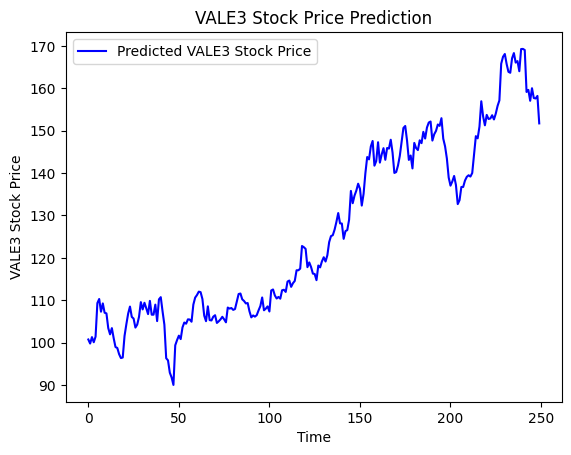

In [41]:
import matplotlib.pyplot as plt

plt.plot(valores, color = "blue", label = "Predicted VALE3 Stock Price")
plt.title("VALE3 Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("VALE3 Stock Price")
plt.legend()
plt.show()

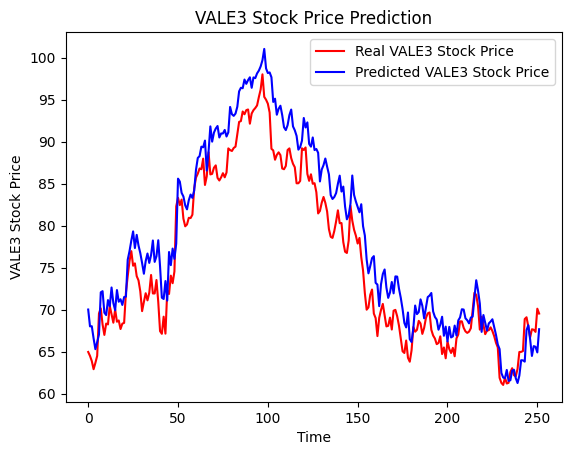

In [42]:
import matplotlib.pyplot as plt

plt.plot(df_testando['real'], color = "red", label = "Real VALE3 Stock Price")
plt.plot(df_testando['predicted'], color = "blue", label = "Predicted VALE3 Stock Price")
plt.title("VALE3 Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("VALE3 Stock Price")
plt.legend()
plt.show()